# Homework 2: Classification
## Rob Taylor (assigned partner: Matt Bruggeman)
### We had both made progress on our solution prior to team programming. In fact, I normally work with Sharon Lynch Grey, but we turn in individual work. In the future, you can assume that Sharon and I will be working together even if we turn in individual assignments.

AI 240 Programming Machine Learning

## Includes the following phases: 
Training 
Testing phase
prediction
Evaluation

### Setup

In [4]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Training tools for Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Modeling Tools
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap

In [7]:
# Evaluation Tools
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#### Get the data from CSV

In [9]:
# load into datafram
df_heart = pd.read_csv('heart.csv')

## Data Exploration
Understanding the dataset and key features.

In [11]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
# I didn't know what all these things are so I looked them up. Then I gave them names that made sense:
column_map = {
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type', # 0: Typical angina 1: Atypical angina 2: Non-anginal pain 3: Asymptomatic
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_angina',
    'oldpeak': 'st_depression', # Measures ST depression induced by exercise relative to rest.
    'slope': 'st_slope', # Describes the slope of the ST segment during peak exercise: 
            # 0: Upsloping 1: Flat 2: Downsloping
    'ca': 'num_major_vessels', # Number of major vessels (0–3) colored by fluoroscopy
    'thal': 'thalassemia',
    'target': 'heart_disease'
}

df_heart.rename(columns=column_map, inplace=True)
df_heart.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   sex                  1025 non-null   int64  
 2   chest_pain_type      1025 non-null   int64  
 3   resting_bp           1025 non-null   int64  
 4   cholesterol          1025 non-null   int64  
 5   fasting_blood_sugar  1025 non-null   int64  
 6   rest_ecg             1025 non-null   int64  
 7   max_heart_rate       1025 non-null   int64  
 8   exercise_angina      1025 non-null   int64  
 9   st_depression        1025 non-null   float64
 10  st_slope             1025 non-null   int64  
 11  num_major_vessels    1025 non-null   int64  
 12  thalassemia          1025 non-null   int64  
 13  heart_disease        1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
df_heart.describe()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Just a note. You mentioned in the lecture that this type of Logistic regression is sensitive to outliers. The thing is that this is a medical application. So I wonder if outliers really need to be in there. We wouldn't want to say "Nah... no disease" when in some "outlier" cases, there is one. I don't know. But I just didn't feel right pulling them out.

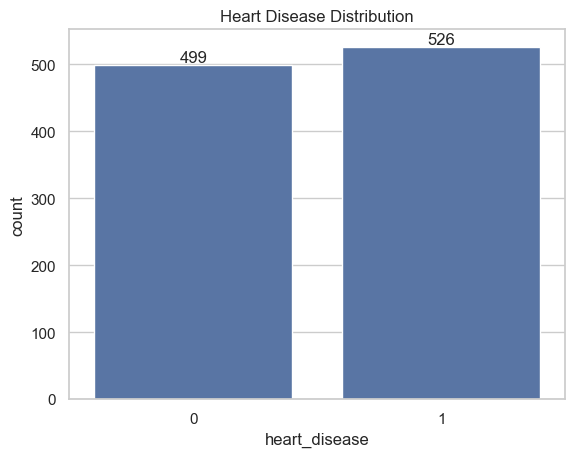

In [61]:
# Check for class balance
sns.set(style="whitegrid")

# Count plot with labeled bars
ax = sns.countplot(data=df_heart, x='heart_disease')

ax.bar_label(ax.containers[0])  # Access the first container in the list

plt.title("Heart Disease Distribution")
plt.show()

In [16]:
# The following heatmap helps us see where strong correlations may be. In this case, green is a positive correlation while
# red is a negative correlation. So, if I understand this correctly, white-ish green means a weak or neutral correlation.

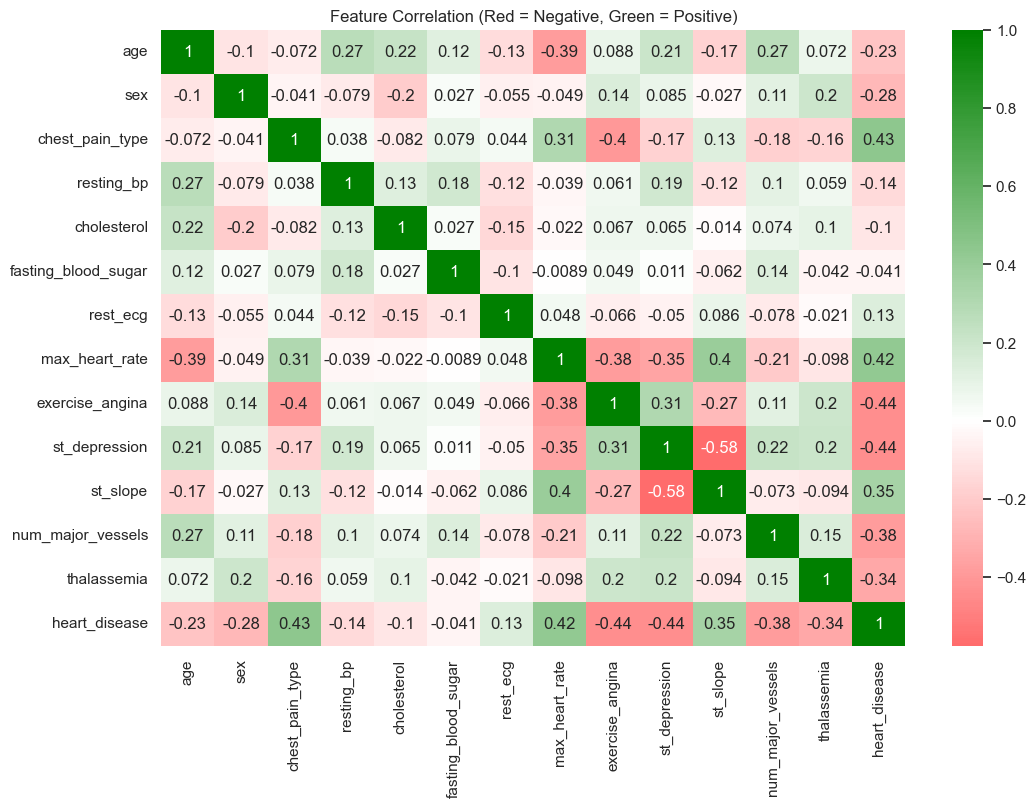

In [17]:
red_green_cmap = LinearSegmentedColormap.from_list("RedGreen", ["red", "white", "green"])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heart.corr(), annot=True, cmap=red_green_cmap, center=0)
plt.title("Feature Correlation (Red = Negative, Green = Positive)")
plt.show()

## Data Processing
Cleaning the data, handling missing values, and normalizing features.

In [19]:
# Get rid of any NA values (In looking at the data, it didn't seem like there were errors but still...)
df_heart = df_heart.dropna()

In [20]:
# Set up dependent and independent variables.
X = df_heart.drop('heart_disease', axis=1)
y = df_heart['heart_disease']

In [21]:
# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1, stratify=y
)

### Modeling using Logistic Regression
Implementing and evaluating machine learning model - Logistic Regression

In [24]:
# Initialize the model
model = LogisticRegression()

In [25]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Get some predictions
y_pred = model.predict(X_test)

## Evaluation
Evaluate the model 

In [28]:
# Let's build a Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [29]:
cnf_matrix

array([[76, 24],
       [10, 95]], dtype=int64)

This represents:
#### Confusion Matrix
|                          | Predicted: No Disease (0) | Predicted: Disease (1) |
|--------------------------|---------------------------|-------------------------|
| **Actual: No Disease (0)** | 76 (True Negatives, TN)       | 24 (False Positives, FP)     |
| **Actual: Disease (1)**   | 10 (False Negatives, FN)       | 95 (True Positives, TP)     |


Text(0.5, 427.9555555555555, 'Predicted label')

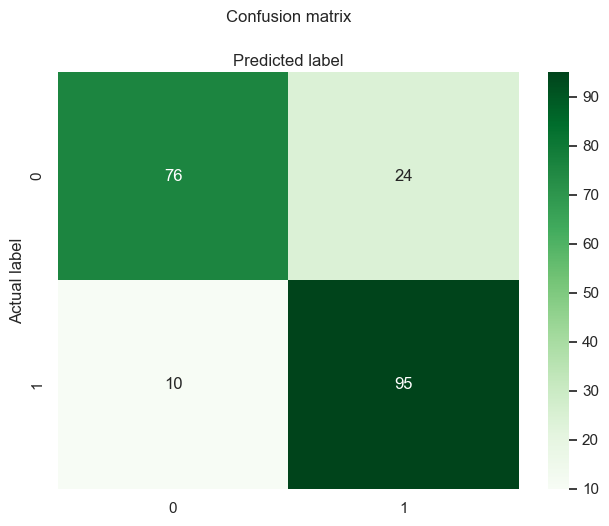

In [31]:
# OKAY, Let's visualize this bad boy
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
# Let's do some calculations:
# Metrics from sklearn
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8341
Precision: 0.7983
Recall: 0.9048
F1 Score: 0.8482
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       100
           1       0.80      0.90      0.85       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



So, <b>83% of the time, the model correctly predicted outcome.</b> It seems to error on the side of suggesting they have heart disease rather than not. This is good because we would not like to miss it. Meaning, *low False Negatives*.

Similarly, teh Recall of 90% says that when they had heart disease, 9/10 times, the model was correct. Not the greatest, but I would like to see how the real doctors fared.

I'm not real clear on the F1 score (harmonic mean of precision), but from what I understand, it means that the *data is balanced.* 

# Bonus The Male/Female predictions
#### So I want to know if the model is more or less accurate if we isolate the data to men or women specifically.

In [35]:
# Split the data into males and females
df_male = df_heart[df_heart['sex'] == 1]  # Male data
df_female = df_heart[df_heart['sex'] == 0]  # Female data

# Separate features for males and females
X_male = df_male.drop('heart_disease', axis=1)
y_male = df_male['heart_disease']
X_female = df_female.drop('heart_disease', axis=1)
y_female = df_female['heart_disease']

# Retrain the models
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_male, y_male, test_size=0.2, random_state=42)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Step 4: Train separate models
model_male = LogisticRegression(max_iter=1000)
model_male.fit(X_m_train, y_m_train)

model_female = LogisticRegression(max_iter=1000)
model_female.fit(X_f_train, y_f_train)

print("Classification Report for Males:")
y_m_pred = model_male.predict(X_m_test)
print(classification_report(y_m_test, y_m_pred))

print("Classification Report for Females:")
y_f_pred = model_female.predict(X_f_test)
print(classification_report(y_f_test, y_f_pred))

Classification Report for Males:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        76
           1       0.78      0.81      0.79        67

    accuracy                           0.80       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143

Classification Report for Females:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.92      1.00      0.96        47

    accuracy                           0.94        63
   macro avg       0.96      0.88      0.91        63
weighted avg       0.94      0.94      0.93        63



### What I'm Seeing

By breaking this into **male** and **female** groups, we can see that:

- For **men**, the model predictions are similar to the original overall results, with an accuracy of around **80%**.
- For **women**, accuracy **jumps to 94%**!  
  - **Precision**: `1.00` for *no disease*, `0.92` for *disease*.
  - This is **outstanding performance**.

If you are **female** and you`re showing these symptoms/features, the model seems to work **very well**.

- For **men**, the model is still good, solid and balanced.
- But it`s clear the model is a **better predictor in women**, at least on this dataset.